In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random as rand

In [5]:
def ls(A, b):
    return np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

In [ ]:
def cubic_spline(x_i, y_i, x, end="Natural", v=(0, 0)):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1]
    dy = y_i[1:] - y_i[:-1]
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
      
  # 钳制样条
        M[0, :2] = [2*dx[0], dx[0]]
        M[-1, -2:] = [dx[-1], 2*dx[-1]]
        N[0] = 3*(dy[0]/dx[0] - v[0])
        N[-1] = 3*(v[-1] - dy[-1]/dx[-1])
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    for i in range(n-1):
        if x_i[i] <= x and x <= x_i[i+1]:
            return a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3

# 例1

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[-2.2 -2.8 -6.1 -3.9  0.   1.1 -0.6 -1.1]


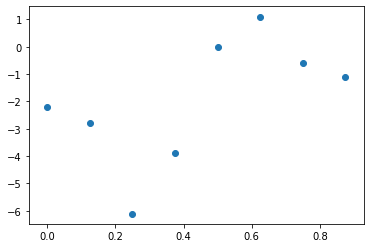

In [2]:
ti = np.linspace(0, 7/8, 8)
print(ti)
tmp=np.array([-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1], dtype=float)
print(tmp)
plt.scatter(ti, tmp)

In [5]:
#模型y=c1+c2 cos(2\pi t)+ c3 sin(2\pi t)
A = np.zeros((3, 8), dtype=float)
print(A)
#for i in range(8):
A[0]=ti**0
A[1]=np.cos(2*np.pi*ti)
A[2]=np.sin(2*np.pi*ti)
print("A",A)
A=A.T
print(A)
b=tmp
c=ls(A,b)
print(c)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
A [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
  -1.00000000e+00 -7.07106781e-01 -1.83697020e-16  7.07106781e-01]
 [ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
   1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01]]
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  7.07106781e-01  7.07106781e-01]
 [ 1.00000000e+00  6.12323400e-17  1.00000000e+00]
 [ 1.00000000e+00 -7.07106781e-01  7.07106781e-01]
 [ 1.00000000e+00 -1.00000000e+00  1.22464680e-16]
 [ 1.00000000e+00 -7.07106781e-01 -7.07106781e-01]
 [ 1.00000000e+00 -1.83697020e-16 -1.00000000e+00]
 [ 1.00000000e+00  7.07106781e-01 -7.07106781e-01]]
[-1.95       -0.74445436 -2.55940386]


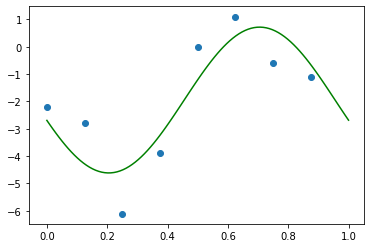

In [6]:
plt.scatter(ti, tmp)
t_range=np.linspace(0,1,100)
yi=c[0]+c[1]*np.cos(2*3.14*t_range)+c[2]*np.sin(2*3.14*t_range)
plt.plot(t_range,yi,'g-')

# 改进模型

In [7]:
#模型y=c1+c2 cos(2\pi t)+ c3 sin(2\pi t)+c4 cos(4 \pi t)

A = np.zeros((4, 8), dtype=float)
print(A)

A[0]=ti**0
A[1]=np.cos(2*3.14*ti)
A[2]=np.sin(2*3.14*ti)
A[3]=np.cos(4*3.14*ti)
print(A)
A=A.T
print(A)
b=tmp
c=ls(A,b)
print(c)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  7.07388269e-01  7.96326711e-04 -7.06261645e-01
  -9.99998732e-01 -7.08513099e-01 -2.38897811e-03  7.05133229e-01]
 [ 0.00000000e+00  7.06825181e-01  9.99999683e-01  7.07950909e-01
   1.59265292e-03 -7.05697661e-01 -9.99997146e-01 -7.09074840e-01]
 [ 1.00000000e+00  7.96326711e-04 -9.99998732e-01 -2.38897811e-03
   9.99994927e-01  3.98162345e-03 -9.99988586e-01 -5.57425870e-03]]
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  7.07388269e-01  7.06825181e-01  7.96326711e-04]
 [ 1.00000000e+00  7.96326711e-04  9.99999683e-01 -9.99998732e-01]
 [ 1.00000000e+00 -7.06261645e-01  7.07950909e-01 -2.38897811e-03]
 [ 1.00000000e+00 -9.99998732e-01  1.59265292e-03  9.99994927e-01]
 [ 1.00000000e+00 -7.08

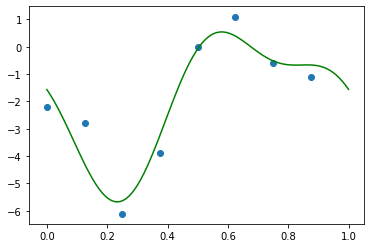

In [8]:
plt.scatter(ti, tmp)
t_range=np.linspace(0,1,100)
yi=c[0]+c[1]*np.cos(2*3.14*t_range)+c[2]*np.sin(2*3.14*t_range)+c[3]*np.cos(4*3.14*t_range)
plt.plot(t_range,yi,'g-')

# 例2

[ 1.  2.  4.  8. 12. 15. 19. 23. 27. 29. 30. 32. 33.]
[2.25e+03 2.50e+03 5.00e+03 2.90e+04 1.20e+05 2.75e+05 1.18e+06 3.10e+06
 7.50e+06 2.40e+07 4.20e+07 2.20e+08 4.10e+08]


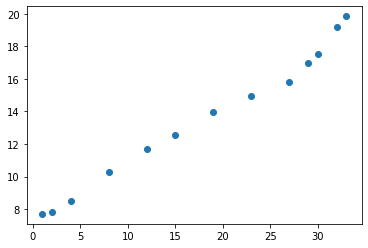

In [6]:
ti = np.array([1,2,4,8,12,15,19,23,27,29,30,32,33], dtype=float)
print(ti)
tmp=np.array([2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000,410000000], dtype=float)
print(tmp)
num=np.log(tmp)
plt.scatter(ti, num)

In [7]:
#模型ln(y)=k+c2 t

A = np.zeros((2, 13), dtype=float)
print(A)

A[0]=ti**0
A[1]=ti
print(A)
A=A.T
print(A)
b=num
c=ls(A,b)
print(c)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 12. 15. 19. 23. 27. 29. 30. 32. 33.]]
[[ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  8.]
 [ 1. 12.]
 [ 1. 15.]
 [ 1. 19.]
 [ 1. 23.]
 [ 1. 27.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 32.]
 [ 1. 33.]]
[7.19694301 0.35463996]


In [8]:
print(np.exp(c[0]))

1335.34238407948


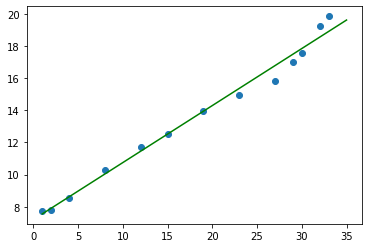

In [9]:
plt.scatter(ti, num)
t_range=np.linspace(1,35,100)
yi=c[0]+c[1]*t_range
plt.plot(t_range,yi,'g-')

# 正交化

In [10]:
def norm(x):
    return np.sqrt(sum(x**2))

def QR_classical(A):
    m, n = A.shape

    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    k = n

    r = norm(A[:, 0])
    Q[:, 0] = A[:, 0] / r
    R[0, 0] = r

    for i in range(1, k):
        y = A[:, i]
        for j in range(i):
            r = np.dot(Q[:, j], A[:, i])
            y = y - r*Q[:, j]
            R[j, i] = r
        r = norm(y)
        Q[:, i] = y / r
        R[i, i] = r
        
    return Q, R

# 例1

In [12]:
import numpy as np
A = np.array([[-2,1], [0,1], [1,1],[2,1]])
A = np.array([[1,0], [1,1], [1,2]])
Q, R = QR_classical(A)
print("Q:\n", Q)
print("R:\n", R)

q,r = np.linalg.qr(A)
print(q)
print(r)

Q:
 [[ 5.77350269e-01 -7.07106781e-01]
 [ 5.77350269e-01 -1.57009246e-16]
 [ 5.77350269e-01  7.07106781e-01]]
R:
 [[1.73205081 1.73205081]
 [0.         1.41421356]]
[[-5.77350269e-01  7.07106781e-01]
 [-5.77350269e-01  4.43378006e-17]
 [-5.77350269e-01 -7.07106781e-01]]
[[-1.73205081 -1.73205081]
 [ 0.         -1.41421356]]


In [13]:
print(Q.T.dot(Q))

[[ 1.0000000e+00 -3.2385832e-16]
 [-3.2385832e-16  1.0000000e+00]]


In [14]:
print(Q.dot(Q.T))

[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


In [5]:
b=np.array([0,np.log(2),np.log(2),np.log(5)])
(Q.T).dot(b)


array([1.30400767, 1.298696  ])

# 改进法

In [15]:
def QR_modified(A, reduced=False):
    m, n = A.shape

    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    k = n

    r = norm(A[:, 0])
    Q[:, 0] = A[:, 0] / r
    R[0, 0] = r

    for i in range(1, k):
        y = A[:, i]
        for j in range(i):
            r = np.dot(Q[:, j], y)
            y = y - r*Q[:, j]
            R[j, i] = r

        r = norm(y)
        Q[:, i] = y / r
        R[i, i] = r

    return Q, R

In [16]:
A = np.array([[1,0], [1,1], [1,2]])
#A = np.array([[1,1,1],[10**(-10),0,0],[0,10**(-10),0],[0,0,10**(-10)]])
Q, R = QR_classical(A)
print("Q:\n", Q)
print("R:\n", R)

Q:
 [[ 5.77350269e-01 -7.07106781e-01]
 [ 5.77350269e-01 -1.57009246e-16]
 [ 5.77350269e-01  7.07106781e-01]]
R:
 [[1.73205081 1.73205081]
 [0.         1.41421356]]


In [17]:
#A = np.array([[1,0], [1,1], [1,2]])
Q, R = QR_modified(A)
print("Q:\n", Q)
print("R:\n", R)

Q:
 [[ 5.77350269e-01 -7.07106781e-01]
 [ 5.77350269e-01 -1.57009246e-16]
 [ 5.77350269e-01  7.07106781e-01]]
R:
 [[1.73205081 1.73205081]
 [0.         1.41421356]]


# 反射子

In [23]:
z=np.array([2,-2,-2])
z1=z.reshape(-1,1)
print(z1.dot(z1.T))
print(z1.T.dot(z1))

[[ 4 -4 -4]
 [-4  4  4]
 [-4  4  4]]
[[12]]


In [25]:
h1=np.identity(3)-2*z1.dot(z1.T)/z1.T.dot(z1)
print(h1)

[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667 -0.66666667  0.33333333]]


In [28]:
z=np.array([8,4])
z1=z.reshape(-1,1)
h1=np.identity(2)-2*z1.dot(z1.T)/z1.T.dot(z1)
print(h1)

[[-0.6 -0.8]
 [-0.8  0.6]]


In [31]:
def norm(x):
    return np.sqrt(sum(x**2))

def QR_Householder(A):
    m, n = np.shape(A)
    H = np.tile(np.identity(m), (n, 1, 1))
    R = A.copy()

    for i in range(n):
        A_i = R[i:, i]
        w = np.zeros(m - i) # y
        w[0] = norm(A_i) 

        v = (A_i - w).reshape(-1, 1) #z
        P = np.dot(v, v.T) / norm(v)**2

        H[i, i:, i:] -= 2*P
        R = np.dot(H[i], R)
    Q = np.linalg.multi_dot(H)
    
    return Q, R

In [32]:
A = np.array([[1,0], [1,1], [1,2]])
print(A)
print(np.shape(A))

[[1 0]
 [1 1]
 [1 2]]
(3, 2)


In [34]:
H=np.tile(np.identity(3), (2, 1,1))
print(H)
print("h0: ",H[0])
print("h1: ",H[1])

[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]
h0:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
h1:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [30]:
z=np.array([2,-2,-2]).reshape(1, -1)
print(z)
print(np.dot(z,z.T))
print(np.dot(z.T,z))
np.identity(3)-2*np.dot(z,z.T)/np.dot(z.T,z)

[[ 2 -2 -2]]
[[12]]
[[ 4 -4 -4]
 [-4  4  4]
 [-4  4  4]]


array([[-5.,  6.,  6.],
       [ 6., -5., -6.],
       [ 6., -6., -5.]])

In [34]:
A = np.array([[1,-4], [2,3], [2,2]])
Q, R = QR_Householder(A)
print("Q:\n", Q)
print("R:\n", R)

Q:
 [[ 0.33333333 -0.93333333 -0.13333333]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667  0.13333333  0.73333333]]
R:
 [[ 3.00000000e+00  2.00000000e+00]
 [ 3.10862447e-16  5.00000000e+00]
 [ 4.44089210e-17 -8.88178420e-16]]


In [12]:
A = np.array([[1,-4], [2,3], [2,2]])
Q, R = QR_Householder(A)
print("Q:\n", Q)
print("R:\n", R)

Q:
 [[ 0.33333333 -0.93333333 -0.13333333]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667  0.13333333  0.73333333]]
R:
 [[ 3.00000000e+00  2.00000000e+00]
 [ 3.10862447e-16  5.00000000e+00]
 [ 4.44089210e-17 -8.88178420e-16]]
